 # Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;






# Showz - entradas a eventos 

Vamos a analizar datos de Showz desde enero de 2017 hasta diciembre de 2018 para entender el comportamiento de los clientes. Contamos con registros del servidor, pedidos y estadísticas de gastos en marketing. El objetivo es analizar cómo usan el servicio, cuándo comienzan a comprar y cuánto dinero generan.

In [2]:
# Comenzamos con las librerias necesarias
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
# Creamos funcion para mejor lectura de datos

def EDA (data):
    display(data.head())
    print()
    print()
    display(data.describe())
    print()
    print()
    display(data.info())
    print()
    print()
    print('Number of duplicates:')
    display(data.duplicated().sum())
    print()
    print()
    print('Number of N/A')
    print(data.isna().sum())


In [4]:
# Comenzamos la carga de datos
costs_us = pd.read_csv('costs_us.csv')
orders_log_us = pd.read_csv('orders_log_us.csv')
visits_log_us = pd.read_csv('visits_log_us.csv')

In [5]:
# Comenzamos el EDA y limpiamos datos

costs_us['dt'] = pd.to_datetime(costs_us["dt"])
costs_us["month"] = costs_us["dt"].dt.to_period('M').dt.to_timestamp()
print('EDA for Costs Dataset:')
EDA(costs_us)

EDA for Costs Dataset:


,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


,source_id,dt,costs,month
count,2542.000000,2542,2542.000000,2542
mean,4.857199,2017-11-29 09:04:57.403619072,129.477427,2017-11-14 15:40:55.704169984
min,1.000000,2017-06-01 00:00:00,0.540000,2017-06-01 00:00:00
25%,2.000000,2017-08-30 00:00:00,21.945000,2017-08-01 00:00:00
50%,4.000000,2017-11-29 00:00:00,77.295000,2017-11-01 00:00:00
75%,9.000000,2018-02-28 00:00:00,170.065000,2018-02-01 00:00:00
max,10.000000,2018-05-31 00:00:00,1788.280000,2018-05-01 00:00:00
std,3.181581,NaN,156.296628,NaN




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
 3   month      2542 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 79.6 KB


None



Number of duplicates:


0



Number of N/A
source_id    0
dt           0
costs        0
month        0
dtype: int64


In [6]:
orders_log_us.columns = orders_log_us.columns.str.lower().str.replace(" ", "_")
orders_log_us["buy_ts"] = pd.to_datetime(orders_log_us["buy_ts"])
orders_log_us["buy_dt"] = orders_log_us["buy_ts"].dt.date
orders_log_us["buy_month"] = orders_log_us["buy_ts"].dt.to_period('M').dt.to_timestamp()
print('EDA for Orders dataset')
EDA(orders_log_us)

EDA for Orders dataset


,buy_ts,revenue,uid,buy_dt,buy_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


,buy_ts,revenue,uid,buy_month
count,50415,50415.000000,5.041500e+04,50415
mean,2017-12-20 05:14:24.846176768,4.999647,9.098161e+18,2017-12-04 08:09:47.825051904
min,2017-06-01 00:10:00,0.000000,3.135781e+14,2017-06-01 00:00:00
25%,2017-10-13 17:28:00,1.220000,4.533567e+18,2017-10-01 00:00:00
50%,2017-12-21 14:12:00,2.500000,9.102274e+18,2017-12-01 00:00:00
75%,2018-03-02 16:10:00,4.890000,1.368290e+19,2018-03-01 00:00:00
max,2018-06-01 00:02:00,2633.280000,1.844617e+19,2018-06-01 00:00:00
std,NaN,21.818359,5.285742e+18,NaN




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   buy_ts     50415 non-null  datetime64[ns]
 1   revenue    50415 non-null  float64       
 2   uid        50415 non-null  uint64        
 3   buy_dt     50415 non-null  object        
 4   buy_month  50415 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1), uint64(1)
memory usage: 1.9+ MB


None



Number of duplicates:


0



Number of N/A
buy_ts       0
revenue      0
uid          0
buy_dt       0
buy_month    0
dtype: int64


In [7]:
visits_log_us.columns = visits_log_us.columns.str.lower().str.replace(" ", "_")
visits_log_us["end_ts"] = pd.to_datetime(visits_log_us["end_ts"])
visits_log_us["start_ts"] = pd.to_datetime(visits_log_us["start_ts"])
print('EDA for visits dataset:')
EDA(visits_log_us)


EDA for visits dataset:


,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


,end_ts,source_id,start_ts,uid
count,359400,359400.000000,359400,3.594000e+05
mean,2017-12-18 06:28:15.036205056,3.750515,2017-12-18 06:17:32.010517760,9.202557e+18
min,2017-06-01 00:02:00,1.000000,2017-06-01 00:01:00,1.186350e+13
25%,2017-10-15 09:45:45,3.000000,2017-10-15 09:41:00,4.613407e+18
50%,2017-12-18 18:59:30,4.000000,2017-12-18 18:46:00,9.227413e+18
75%,2018-02-28 10:08:15,5.000000,2018-02-28 09:54:00,1.372824e+19
max,2018-06-01 01:26:00,10.000000,2018-05-31 23:59:00,1.844668e+19
std,NaN,1.917116,NaN,5.298433e+18




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


None



Number of duplicates:


0



Number of N/A
device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64


<div class="alert alert-block alert-success"> 
<b>Comentario del revisor</b> <a class="tocSkip"></a><br> 
<b>Éxito</b> - ¡Excelente trabajo! La carga y exploración inicial de los datos están bien estructuradas. La función `EDA` es una gran estrategia para mejorar la legibilidad y optimizar el análisis. Además, la conversión de fechas y la limpieza de nombres de columnas facilitarán mucho el procesamiento posterior. Continúa con esta buena práctica en las siguientes etapas del proyecto. 🚀💡 
</div>

Paso 2. Haz informes y calcula métricas 

Visitas:
¿Cuántas personas lo usan cada día, semana y mes?
¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).
¿Cuál es la duración de cada sesión?
¿Con qué frecuencia los usuarios regresan?

In [9]:
# Separemos los datos de nuestras fechas en sus respectivas columnas 

visits_log_us['session_year'] = visits_log_us['start_ts'].dt.isocalendar().year
visits_log_us['session_month'] = visits_log_us['start_ts'].dt.to_period(
    'M').dt.to_timestamp()
visits_log_us['session_week'] = visits_log_us['start_ts'].dt.isocalendar().week
visits_log_us['session_date'] = visits_log_us['start_ts'].dt.date
visits_log_us.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,52,2017-12-27


Daily Active Users: uid    907.991758
dtype: float64
Weekly Active Users: uid    5716.245283
dtype: float64
Monthly Active Users: uid    23228.416667
dtype: float64


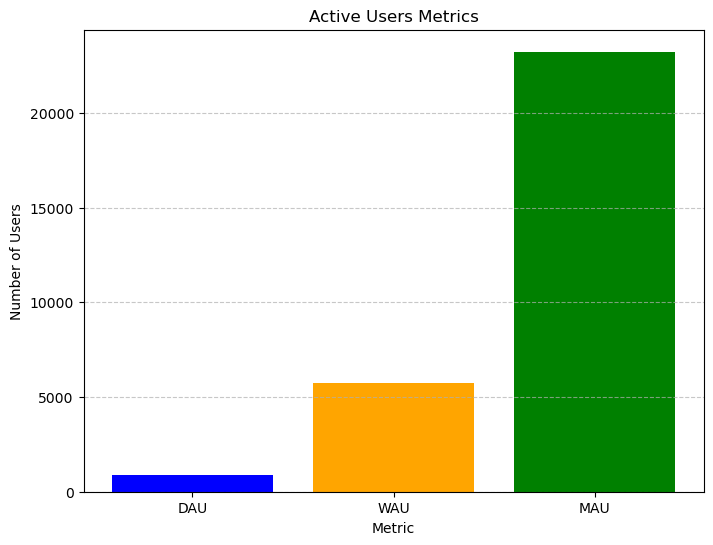

In [70]:
#¿Cuántas personas lo usan cada día, semana y mes? Obtendremos el DAU,WAU y el MAU

dau = (visits_log_us.groupby(['session_year', 'session_date']).agg({'uid': 'nunique'}).mean())
wau = (visits_log_us.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean())
mau = (visits_log_us.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean())

print('Daily Active Users:',dau)
print('Weekly Active Users:',wau)
print('Monthly Active Users:',mau)

# cambia a series o error
dau_value = dau.iloc[0]
wau_value = wau.iloc[0]
mau_value = mau.iloc[0]

metrics = {'DAU': dau_value, 'WAU': wau_value, 'MAU': mau_value}

# Crear una gráfica de barras
plt.figure(figsize=(8, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green'])
plt.title('Active Users Metrics')
plt.ylabel('Number of Users')
plt.xlabel('Metric')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [11]:
#¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).
daily_sessions = visits_log_us.groupby('session_date').agg({'uid': 'count'})
print('The average visits per day:', daily_sessions.mean())

The average visits per day: uid    987.362637
dtype: float64


In [12]:
# ¿Cuál es la duración de cada sesión?
visits_log_us['duration'] = (visits_log_us['end_ts'] - visits_log_us['start_ts']).dt.total_seconds()
total_duration= visits_log_us['duration'].mode()[0]
print('The average duration per session is of:',total_duration)

The average duration per session is of: 60.0


In [13]:
#¿Con qué frecuencia los usuarios regresan? # checa el sticky ipynb num 10 crt + f = sticky
stickywau = dau / wau * 100
print('weekly sticky factor',stickywau)
stickymau = dau / mau * 100
print('montly sticky factor',stickymau

# El  MSF es bajo por lo que podemos trabajar en estrategias de retención, como notificaciones, contenido relevante o incentivos para que los usuarios vuelvan con más frecuencia.

weekly sticky factor uid    15.884409
dtype: float64
montly sticky factor uid    3.90897
dtype: float64


<div class="alert alert-block alert-success"> 
<b>Comentario del revisor</b> <a class="tocSkip"></a><br> 
<b>Éxito</b> - ¡Muy buen trabajo en la generación de métricas clave para el análisis de usuarios! 🎯 El cálculo del DAU, WAU y MAU es fundamental para comprender la actividad de los usuarios, y la visualización con barras facilita la interpretación. Además, incluir la duración de las sesiones y el **sticky factor** proporciona información valiosa sobre la retención. 🚀 ¡Sigue así! 
</div>


Paso 2

Ventas:

¿Cuándo empieza la gente a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.)
¿Cuántos pedidos hacen durante un período de tiempo dado?
¿Cuál es el tamaño promedio de compra?
¿Cuánto dinero traen? (LTV)

In [15]:
first_purchase = orders_log_us.groupby('uid').agg({'buy_dt': 'min'}).reset_index()
first_purchase.columns = ['uid','first_order_date']
first_purchase['first_order_date'] = pd.to_datetime(first_purchase['first_order_date'])
first_purchase["first_order_month"] = first_purchase["first_order_date"].dt.to_period('M').dt.to_timestamp()
first_purchase.head()

,uid,first_order_date,first_order_month
0,313578113262317,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11,2017-10-01
3,2464366381792757,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24,2017-11-01


In [16]:
first_registration = visits_log_us.groupby('uid')['session_date'].min().reset_index()
first_registration.columns = ["uid", "first_reg_date"]
first_registration['first_reg_date'] = pd.to_datetime(first_registration['first_reg_date'])
first_registration["first_registration_month"] = first_registration["first_reg_date"].dt.to_period('M').dt.to_timestamp()
first_registration

,uid,first_reg_date,first_registration_month
0,11863502262781,2018-03-01,2018-03-01
1,49537067089222,2018-02-06,2018-02-01
2,297729379853735,2017-06-07,2017-06-01
3,313578113262317,2017-09-18,2017-09-01
4,325320750514679,2017-09-30,2017-09-01
...,...,...,...
228164,18446403737806311543,2017-11-30,2017-11-01
228165,18446424184725333426,2017-12-06,2017-12-01
228166,18446556406699109058,2018-01-01,2018-01-01
228167,18446621818809592527,2017-12-27,2017-12-01


In [17]:
merged_data = pd.merge(visits_log_us, first_registration, on='uid')
merged_data['age_registration'] = ((merged_data['session_month'] - merged_data['first_registration_month']) / (np.timedelta64(1, 'D') * 30)).round().astype(int)
merged_data.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,duration,first_reg_date,first_registration_month,age_registration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,51,2017-12-20,1080.0,2017-12-20,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,8,2018-02-19,1680.0,2018-02-19,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,2017-07-01,0.0,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20,1440.0,2018-03-09,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,52,2017-12-27,0.0,2017-12-27,2017-12-01,0


In [18]:
cohort_1 = merged_data.pivot_table(index = 'first_registration_month', columns = 'age_registration', values = 'uid', aggfunc = 'nunique')
cohort_1

age_registration,0,1,2,3,4,5,6,7,8,9,10,11
first_registration_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,NaN
2017-08-01,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,NaN,NaN
2017-09-01,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,NaN,NaN,NaN
2017-10-01,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,NaN,NaN,NaN,NaN
2017-11-01,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,NaN,NaN,NaN,NaN,NaN
2017-12-01,25268.0,1410.0,960.0,786.0,512.0,481.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,22624.0,1351.0,890.0,565.0,458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,22197.0,1267.0,565.0,446.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


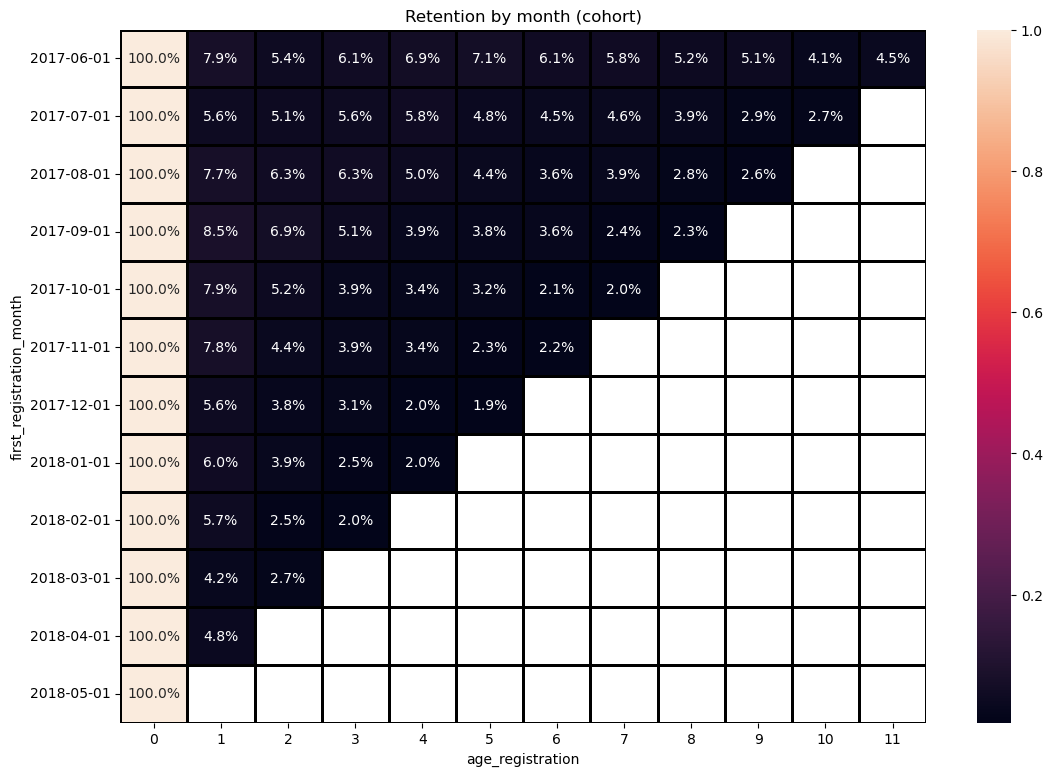

In [19]:
# usamos codigo mejor que formula para simplicidad 
retention = cohort_1.divide(cohort_1[0], axis=0)
retention.columns = cohort_1.columns
retention.index = retention.index.astype(str).str[:10]
retention

#cod de forum

plt.figure(figsize=(13, 9))
plt.title('Retention by month (cohort)')
sns.heatmap(
    retention,
    annot=True,
    fmt='.1%',
    linewidths=1,
    linecolor='black',
)
plt.show()

In [20]:
# ¿Cuándo empieza la gente a comprar?

buyers = pd.merge(first_purchase, orders_log_us, on = 'uid')
#buyers.head()
buyers["age_order"] = ((buyers['buy_month'] - buyers['first_order_month'])/ (np.timedelta64(1, 'D')*30)).round().astype('int')

buyers.head()

# agregar el mean()

,uid,first_order_date,first_order_month,buy_ts,revenue,buy_dt,buy_month,age_order
0,313578113262317,2018-01-03,2018-01-01,2018-01-03 21:51:00,0.55,2018-01-03,2018-01-01,0
1,1575281904278712,2017-06-03,2017-06-01,2017-06-03 10:13:00,1.22,2017-06-03,2017-06-01,0
2,1575281904278712,2017-06-03,2017-06-01,2017-06-03 17:39:00,1.83,2017-06-03,2017-06-01,0
3,2429014661409475,2017-10-11,2017-10-01,2017-10-11 18:33:00,73.33,2017-10-11,2017-10-01,0
4,2464366381792757,2018-01-28,2018-01-01,2018-01-28 15:54:00,2.44,2018-01-28,2018-01-01,0


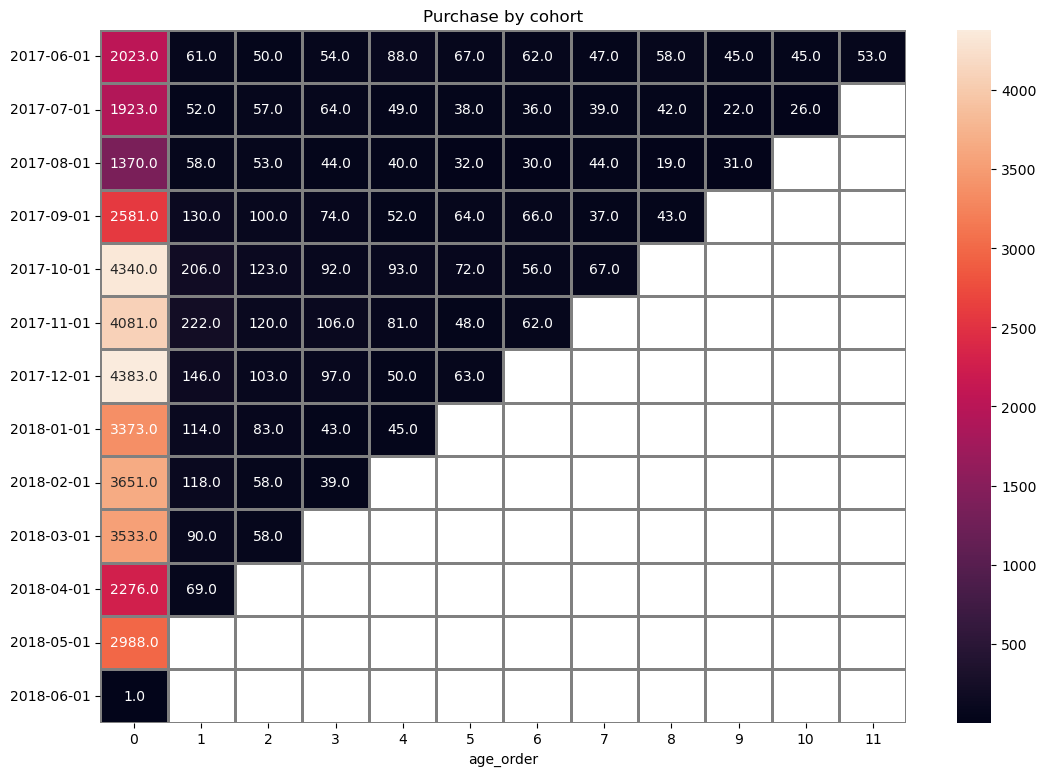

In [21]:
cohort_2 = buyers.pivot_table(index='first_order_month', columns='age_order', values='uid', aggfunc='nunique')
cohort_2.index = [str(fecha)[0:10] for fecha in cohort_2.index]
cohort_2

plt.figure(figsize=(13, 9))
plt.title('Purchase by cohort')
sns.heatmap(
    cohort_2,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray', #cambia el color segun advice en grupo
)
plt.show()

In [72]:
purchase_date = pd.merge(first_purchase, first_registration, on='uid')
purchase_date['days_till_purchase']= ((purchase_date['first_order_date'] - purchase_date['first_reg_date'])/np.timedelta64(1, 'D')).astype('int')
average_days_till_purchase = round(purchase_date['days_till_purchase'].mean(), 2)
print('The average days until the first purchase are of:',average_days_till_purchase)

The average days until the first purchase are of: 16.9


In [23]:
# ¿Cuántos pedidos hacen durante un período de tiempo dado?
all_orders = buyers.merge(orders_log_us[['revenue', 'uid', "buy_month"]])
cohortes2 = all_orders.groupby([ 'buy_month']).agg({'uid': 'nunique', 'revenue': ['count', 'sum']}).reset_index()
cohortes2.rename(columns={'uid': 'uid_number'}, inplace=True)
cohortes2

buy_month uid_number revenue          
                 nunique   count       sum
0  2017-06-01       2023    2630  10436.73
1  2017-07-01       1984    2731  14386.09
2  2017-08-01       1472    2213  10664.24
3  2017-09-01       2750    3927  21355.09
4  2017-10-01       4675    6465  32891.74
5  2017-11-01       4547    6393  30787.93
6  2017-12-01       4942    7094  39312.18
7  2018-01-01       3898    5283  21574.33
8  2018-02-01       4258    5943  28442.98
9  2018-03-01       4181    6152  33556.27
10 2018-04-01       2744    3685  18884.80
11 2018-05-01       3544    5042  22776.42
12 2018-06-01          1       1      3.42

In [74]:
num_orders = buyers.groupby('first_order_month').agg(
    {'uid': 'nunique'}).reset_index()
num_orders.rename(columns={'uid': 'number_of_uid'}, inplace=True)
display(num_orders.head())

all_orders['time_frame_orders'] = ((all_orders['buy_month'] - all_orders['first_order_month']).dt.days / 30).round().astype(int)
all_orders.head()

,first_order_month,number_of_uid
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


,uid,first_order_date,first_order_month,buy_ts,revenue,buy_dt,buy_month,age_order,time_frame_orders
0,313578113262317,2018-01-03,2018-01-01,2018-01-03 21:51:00,0.55,2018-01-03,2018-01-01,0,0
1,1575281904278712,2017-06-03,2017-06-01,2017-06-03 10:13:00,1.22,2017-06-03,2017-06-01,0,0
2,1575281904278712,2017-06-03,2017-06-01,2017-06-03 17:39:00,1.83,2017-06-03,2017-06-01,0,0
3,2429014661409475,2017-10-11,2017-10-01,2017-10-11 18:33:00,73.33,2017-10-11,2017-10-01,0,0
4,2464366381792757,2018-01-28,2018-01-01,2018-01-28 15:54:00,2.44,2018-01-28,2018-01-01,0,0


In [76]:
# ¿Cuál es el tamaño promedio de compra?
purchase_mean = orders_log_us['revenue'].mean()
purchase_mean

4.999646930477041

In [26]:
orders_per_month = orders_log_us.pivot_table(index='buy_month', values= 'revenue', aggfunc='mean')
print(orders_per_month)

# Ingresos en promedio por mes

             revenue
buy_month           
2017-06-01  4.060106
2017-07-01  5.306589
2017-08-01  4.847139
2017-09-01  5.416448
2017-10-01  4.928280
2017-11-01  4.783518
2017-12-01  5.852139
2018-01-01  4.112927
2018-02-01  4.840095
2018-03-01  5.413930
2018-04-01  5.150645
2018-05-01  4.771279
2018-06-01  3.420000


In [27]:
# ¿Cuánto dinero traen? (LTV)
ltv = all_orders.groupby(['first_order_month', 'buy_month']).agg({'uid': 'nunique', 'revenue': 'sum'}).reset_index()
ltv['time_frame'] = ((ltv['buy_month'] - ltv['first_order_month']).dt.days / 30).round().astype('int')
ltv = ltv.merge(num_orders, on='first_order_month')
ltv['ltv'] = cohortes2["revenue"]["sum"] / ltv['number_of_uid']
ltv
# el time frame es para las ordenes mes de compra - el mes de la primera orden

,first_order_month,buy_month,uid,revenue,time_frame,number_of_uid,ltv
0,2017-06-01,2017-06-01,2023,10436.73,0,2023,5.159036
1,2017-06-01,2017-07-01,61,1377.18,1,2023,7.111265
2,2017-06-01,2017-08-01,50,1288.64,2,2023,5.271498
3,2017-06-01,2017-09-01,54,2396.86,3,2023,10.556149
4,2017-06-01,2017-10-01,88,2521.92,4,2023,16.258893
...,...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,58,1759.95,2,3533,NaN
75,2018-04-01,2018-04-01,2276,11768.19,0,2276,NaN
76,2018-04-01,2018-05-01,69,1535.08,1,2276,NaN
77,2018-05-01,2018-05-01,2988,14397.42,0,2988,NaN


In [28]:
# creamos tabla pivot
ltv_pivot = ltv.pivot_table(index="buy_month", columns="time_frame", values="ltv", aggfunc="sum")
ltv_pivot.index = ltv_pivot.index.strftime('%Y-%m-%d') # codigo advise en grupo
ltv_pivot

time_frame,0,1,2,3,4,5,6,7,8,9,10,11
buy_month,,,,,,,,,,,,
2017-06-01,5.159036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-01,0.001778,7.111265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,0.000000,0.000000,5.271498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,0.000000,0.000000,0.000000,10.556149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-01,0.000000,0.000000,0.000000,0.000000,16.258893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-01,0.000000,0.000000,0.000000,0.000000,0.000000,15.218947,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.432615,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.664523,NaN,NaN,NaN,NaN
2018-02-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.059802,NaN,NaN,NaN


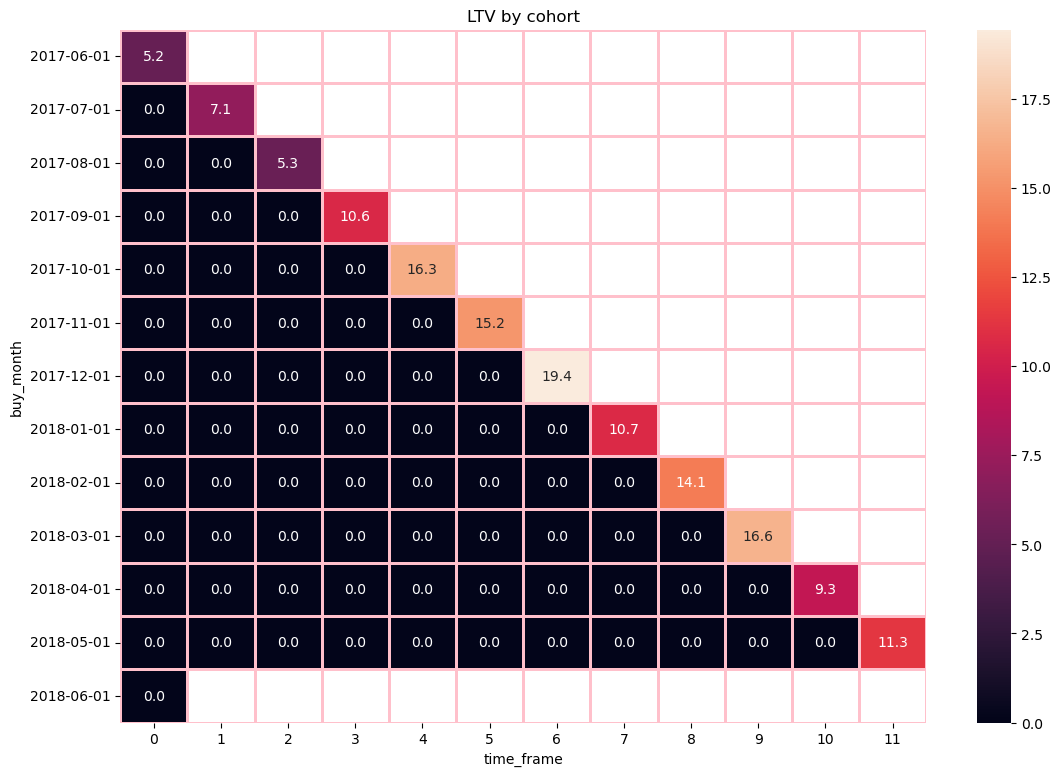

In [29]:
# heat map para el ltv
plt.figure(figsize=(13, 9))
plt.title('LTV by cohort')
sns.heatmap(
    ltv_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='pink',
)
plt.show()

<div class="alert alert-block alert-success"> 
<b>Comentario del revisor</b> <a class="tocSkip"></a><br> 
<b>Éxito</b> - ¡Gran avance en esta sección! Has calculado y visualizado correctamente métricas clave como la retención, las cohortes de compra y el LTV. El uso de mapas de calor para mostrar las tendencias en cohortes es una excelente elección que permite observar fácilmente los patrones de comportamiento. ¡Continúa con este nivel de detalle y claridad en los análisis! 🚀 
</div>

Marketing:
¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)
¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?
¿Cuán rentables eran las inversiones? (ROMI)

In [31]:
#¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)
#pivot como en clase

costs_us.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum')

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


In [83]:
#¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

costs_us.groupby('source_id')['costs'].sum().reset_index().sort_values(by='costs', ascending=False)

,source_id,costs
2,3,141321.63
3,4,61073.60
4,5,51757.10
1,2,42806.04
0,1,20833.27
6,10,5822.49
5,9,5517.49


In [33]:
# ¿Cuán rentables eran las inversiones? (ROMI)
#checa ipybn num 3 ctrl+f = ROMI

(orders_log_us["revenue"].sum()  / costs_us["costs"].sum())*100

76.58249304639888

In [34]:
# Comenzamos con el calculo por fuente
source_of_orders = pd.merge(orders_log_us, visits_log_us[['uid', 'source_id']], on='uid', how='left') #estudiar merge
source_of_orders['month'] = source_of_orders['buy_ts'].dt.to_period('M').dt.to_timestamp()

# Calculamos el income por mes
monthly_rev = source_of_orders.pivot_table(index='month', columns='source_id', values='revenue', aggfunc='sum')

# Calculamos el costo por mes
source_costs = costs_us.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum')

#ROMI
romi = monthly_rev - source_costs
romi = (romi / source_costs) * 100
romi.index = [str(fecha)[0:10] for fecha in romi.index]  #usa formula o codigo advise de arriba 
romi

source_id,1,2,3,4,5,7,9,10
2017-06-01,4477.513526,1944.426913,-3.412338,288.191931,794.744507,NaN,433.153355,195.999618
2017-07-01,10312.220379,2614.583967,52.002575,491.416624,1371.545692,NaN,487.614861,53.101692
2017-08-01,8964.120991,2927.648049,62.565231,430.206443,1759.940145,NaN,759.394207,168.860988
2017-09-01,18495.622532,7928.990240,220.057108,1106.844033,3046.056522,NaN,657.533324,44.830356
2017-10-01,7978.224765,5726.371104,82.370797,875.044854,1997.739883,NaN,634.951839,116.934507
2017-11-01,8133.973237,2501.844434,56.925148,836.297371,1104.843534,NaN,649.751164,104.761724
2017-12-01,11883.340167,13924.652905,281.476024,973.245778,5482.718322,NaN,594.432961,39.663395
2018-01-01,6236.754522,5129.187251,42.621404,545.414801,1519.876124,NaN,277.189488,-11.985025
2018-02-01,8760.387030,5882.444562,88.548806,758.455066,2349.588962,NaN,406.783318,253.901181
2018-03-01,16986.326588,7905.811612,86.151129,676.284119,2104.416264,NaN,596.302234,331.933284


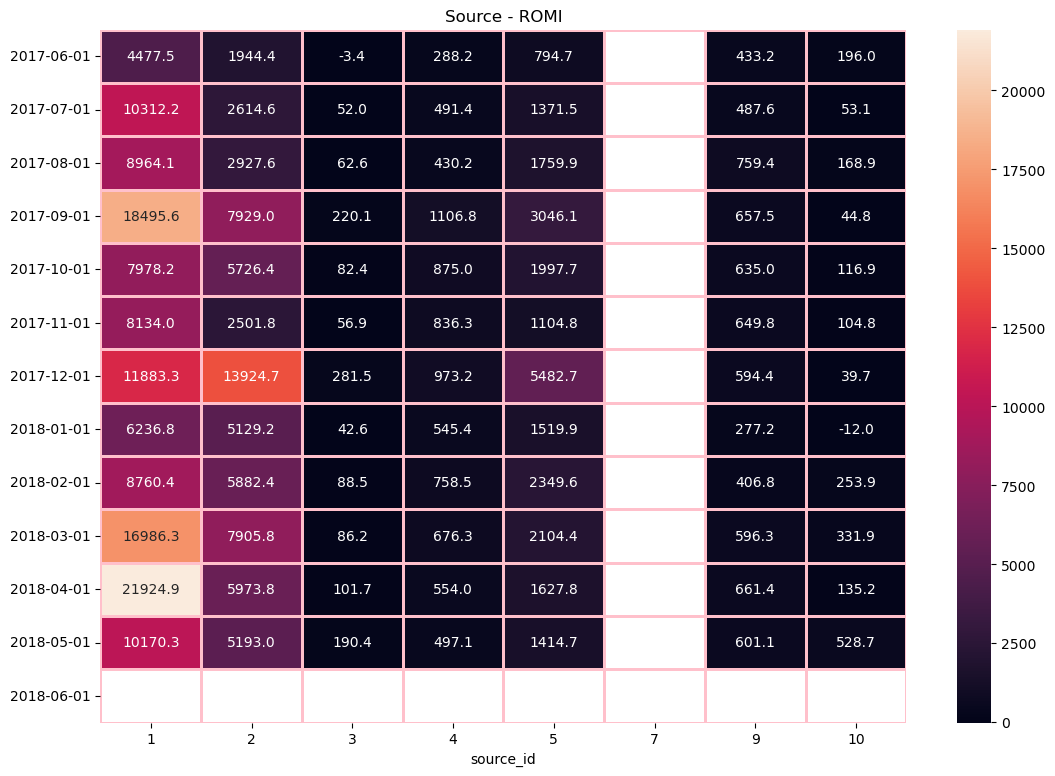

In [35]:
plt.figure(figsize=(13, 9))
plt.title('Source - ROMI')
sns.heatmap(
    romi,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='pink',
)
plt.show()

# Conclusiones y Recomendaciones

Podemos ver que la tasa de retencion baja bastante con el tiempo para todas las cohortes, algo comun en muchos servicios. Por ejemplo, los usuarios registrados en junio de 2017 empiezan con una retencion del 100% en el primer mes, pero cae rapido a menos del 3% en pocos meses. Ya que la retencion baja mucho despues del primer mes, seria clave mejorar el proceso y dar incentivos para que los nuevos usuarios regresen.

Tambien vale la pena analizar las cohortes con retencion mas alta (como septiembre de 2017 y febrero de 2018) para entender que factores ayudaron a su exito.

Los cohortes de septiembre, octubre y diciembre de 2017 tienen los LVT mas altos en comparacion con otros, llegando a picos de 10.6, 16.3 y 19.4, respectivamente. Es importante identificar las campañas, productos o servicios asociados con esas cohortes y usar esa informacion para ajustar estrategias con nuevas cohortes.

Ademas, hay que reforzar las campañas de marketing en meses donde el ROMI es mas alto, como diciembre, para aprovechar las tendencias estacionales. Tambien seria util revisar que estrategias funcionaron en esas fechas.

<div class="alert alert-block alert-success"> 
<b>Comentario del revisor</b> <a class="tocSkip"></a><br> 
<b>Éxito</b> - ¡Excelente trabajo al abordar el análisis de marketing! Has integrado métricas clave como el ROMI, los costos de adquisición y los ingresos por fuente de adquisición. La visualización con mapas de calor es muy efectiva para identificar tendencias y oportunidades. Además, tus conclusiones son claras y accionables, enfocándose en mejorar la retención, ajustar campañas de marketing y priorizar estrategias con base en las cohortes exitosas. ¡Sigue así! 🚀 
</div>

# Comentario general del revisor 

<div class="alert alert-block alert-success"> 
<b>Comentario del revisor</b> <a class="tocSkip"></a><br> 

¡Felicidades Audrey! Tu proyecto está **aprobado**. Has demostrado un excelente manejo del análisis de datos y visualización para responder preguntas clave relacionadas con el comportamiento de los clientes y las estrategias de marketing. A continuación, destaco los puntos positivos y áreas para explorar más:

Puntos Positivos:
- **Procesamiento y limpieza de datos:** Mostraste un enfoque organizado al preparar los datasets para el análisis, incluyendo la conversión de formatos, eliminación de duplicados y manejo de fechas.
- **Análisis de cohortes y retención:** Implementaste correctamente análisis avanzados como tablas de cohortes y mapas de calor para ilustrar la retención y el LTV. Estas visualizaciones aportaron un gran valor a la interpretación de los datos.
- **Evaluación de marketing:** Tus cálculos de ROMI y el desglose por fuente de adquisición fueron muy claros y efectivos para analizar el rendimiento de las inversiones.
- **Conclusiones sólidas:** Propusiste recomendaciones accionables, como estrategias para mejorar la retención, capitalizar campañas exitosas y reforzar meses con alto rendimiento en el ROMI.

Áreas para Seguir Investigando:
- **Estrategias de retención:** Investiga estrategias específicas para mejorar la retención de usuarios más allá del primer mes, como la personalización de la experiencia del usuario o programas de fidelidad.
- **Optimización de campañas:** Realiza un análisis más detallado de las campañas asociadas a cohortes con LTV alto para replicar su éxito en nuevas estrategias.
- **Segmentación avanzada:** Explora segmentaciones adicionales en el análisis de marketing, como comportamiento por dispositivo, ubicación o grupo demográfico.
- **Pruebas A/B:** Considera implementar experimentos de A/B testing en futuras campañas para validar las estrategias sugeridas.

¡Sigue así, estás haciendo un gran trabajo! 💪🚀😊 
</div>